In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv(r"D:\machine Learning\Data\Advertising.csv")

In [12]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
#we need to remove unwanted columns

In [14]:
data=data.drop("Unnamed: 0",axis=1)

In [15]:
# Find missing Values

In [16]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd4712b670>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd4712bd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd4712b310>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd47140430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd47140790>],
 'means': []}

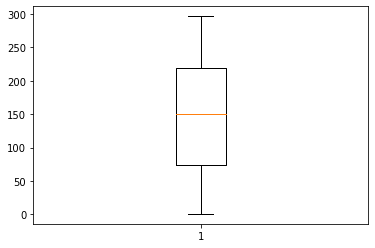

In [17]:
#Box PLot
plt.boxplot(data['TV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd481eb520>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd481ebbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd481eb220>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd481f62e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd481f6640>],
 'means': []}

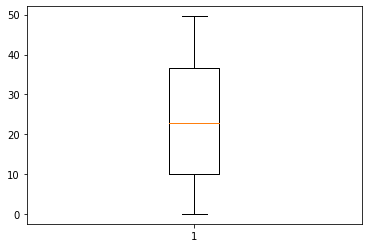

In [18]:
plt.boxplot(data['radio'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd48243fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd482526a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd48243cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd48252d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd4825d100>],
 'means': []}

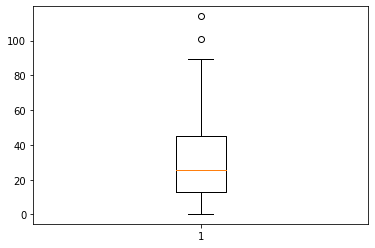

In [19]:
plt.boxplot(data['newspaper'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd482a9af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd482b61f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd482a9790>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd482b6850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd482b6bb0>],
 'means': []}

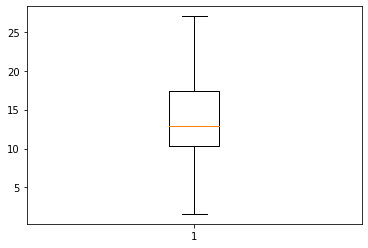

In [20]:
plt.boxplot(data['sales'])

In [26]:
npd = data.newspaper.describe()

In [27]:
npd

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

In [30]:
UT = npd['75%']+1.5*(npd["75%"]-npd['25%']) # upper threshold value for newspaper

In [31]:
UT

93.625

In [32]:
data['newspaper'][data['newspaper']>UT] = UT

In [34]:
data.newspaper.describe()

count    200.000000
mean      30.415750
std       21.316901
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max       93.625000
Name: newspaper, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd48337670>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd48337cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd483373d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd483443d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd48344730>],
 'means': []}

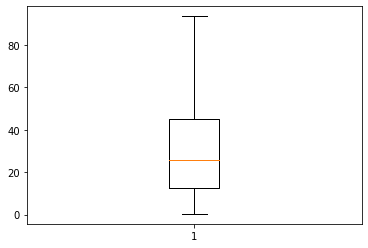

In [35]:
plt.boxplot(data['newspaper'])

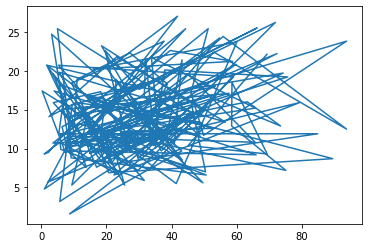

In [37]:
plt.plot(data['newspaper'],data['sales'])  # relation is not purely linear , check scatter plot

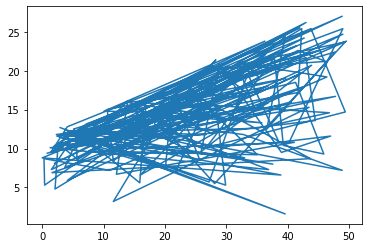

In [42]:
plt.plot(data['radio'],data['sales'])

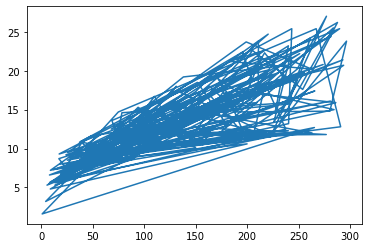

In [44]:
plt.plot(data['TV'],data['sales'])

In [38]:
# correlation matrix

In [40]:
cm = data.corr()
cm

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.059325,0.782224
radio,0.054809,1.000000,0.355953,0.576223
newspaper,0.059325,0.355953,1.000000,0.231432
sales,0.782224,0.576223,0.231432,1.000000


In [41]:
# if we have 100 columns, feature elimamination least important data is eliminated.
#logically we can eliminate like name, Id,address - nominal values where it cannot be compare.
#corr - we can eliminate corr with 0 to 0.1 and o to -0.1  


<AxesSubplot:>

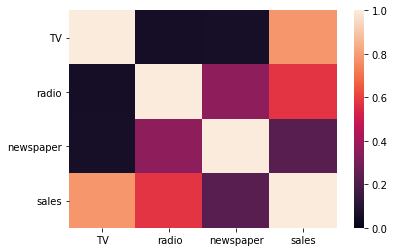

In [46]:
# Heatmap
sns.heatmap(cm,vmax=1, vmin=0)

In [47]:
#split into x and y
X = data.drop("sales", axis =1)
y = data['sales']

In [51]:
#split for trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [55]:
#coefficient of linear regression -m1,m2,m3
reg.coef_

array([0.04543596, 0.19147751, 0.00254094])

In [56]:
#intercept of linear regression 
reg.intercept_

2.778392991085049

### The Line equation will be sales = 0.04543596TV + 0.19147751radio + 0.00254094newspaper

In [57]:
ypred = reg.predict(X_test)   #predicting the sales for testing data

In [58]:
#COMPARE YPRED TO YTEST

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(ypred,y_test)
print("MSE:",MSE)


MSE: 2.8783955736842324


In [59]:
sum((y_test-ypred)**2/len(ypred))  # how we calculate MSE

2.8783955736842333

In [60]:
Results = X_test.copy()
Results['Actual'] = y_test
Results['Predicted'] = ypred
#Results = Result.reset_index()
#Results['Id'] = Results.index
Results.head()


,TV,radio,newspaper,Actual,Predicted
95,163.3,31.6,52.9,16.9,16.383191
15,195.4,47.7,52.9,22.4,20.924473
30,292.9,28.3,43.2,21.4,21.615169
158,11.7,36.9,45.2,7.3,10.490365
128,220.3,49.0,3.2,24.7,22.178465


[]

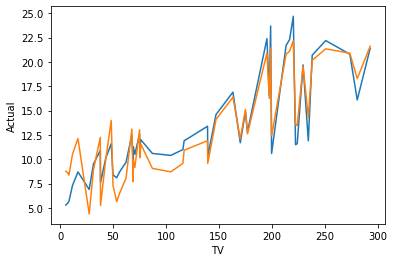

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = "TV", y = 'Actual', data = Results)
sns.lineplot(x = "TV", y = 'Predicted', data = Results)
plt.plot()

[]

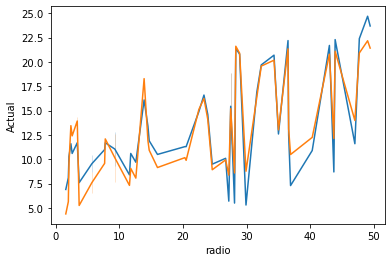

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = "radio", y = 'Actual', data = Results)
sns.lineplot(x = "radio", y = 'Predicted', data = Results)
plt.plot()

[]

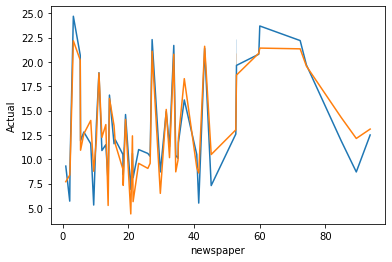

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = "newspaper", y = 'Actual', data = Results)
sns.lineplot(x = "newspaper", y = 'Predicted', data = Results)
plt.plot()

In [ ]:
#END